<a href="https://colab.research.google.com/github/Rawal-29/Artificial-Intelligence/blob/main/Project_1_g_Rawal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ydata-profiling sweetviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('/content/telco-customer_churn.csv')

print("Task 1: Data Preparation")

print(df.isnull().sum())

empty_string_cols = []
for col in df.columns:
    empty_count = (df[col] == " ").sum()
    if empty_count > 0:
        print(f"{col}: {empty_count} empty strings")
        empty_string_cols.append(col)

for col in empty_string_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"Missing values in {col} after conversion:")
    print(df[col].isnull().sum())
    df[col] = df[col].fillna(df[col].median())


numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"Outliers in {col}: {len(outliers)}")

binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
print("\nIdentified binary columns:", binary_cols)
for col in binary_cols:
    unique_values = df[col].unique()
    mapping = {unique_values[0]: 0, unique_values[1]: 1}
    print(f"Mapping for {col}: {mapping}")
    df[col] = df[col].map(mapping)


categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nAll categorical columns to encode:", categorical_cols)

le = LabelEncoder()
for col in categorical_cols:
    print(f"Encoding {col} with {df[col].nunique()} unique values")
    df[col] = le.fit_transform(df[col])


print("\nData types after conversion:")
print(df.dtypes)
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
if non_numeric_cols:
    print("Warning: Some columns remain non-numeric:", non_numeric_cols)
else:
    print("All columns successfully converted to numeric.")





  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fa8e3290c196d6c1d1cf33505fd8c99b7c5db8b052d069c9534a5dd5be190c0b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
Task 1: Data Preparation
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines  

In [3]:
print("Task 2: List Data Types")
print("Data types of each column (after transformation):")
print(df.dtypes)


Task 2: List Data Types
Data types of each column (after transformation):
customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


Task 3: Exploratory Data Analysis
Number of rows: 7043, Number of columns: 21
Basic statistics:
        customerID       gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7043.000000    7043.000000  7043.000000  7043.000000   
mean   3521.000000     0.504756       0.162147     0.516967     0.299588   
std    2033.283305     0.500013       0.368612     0.499748     0.458110   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%    1760.500000     0.000000       0.000000     0.000000     0.000000   
50%    3521.000000     1.000000       0.000000     1.000000     0.000000   
75%    5281.500000     1.000000       0.000000     1.000000     1.000000   
max    7042.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  InternetService  \
count  7043.000000   7043.000000    7043.000000      7043.000000   
mean     32.371149      0.903166       0.940508         0.872923   
std      24.559

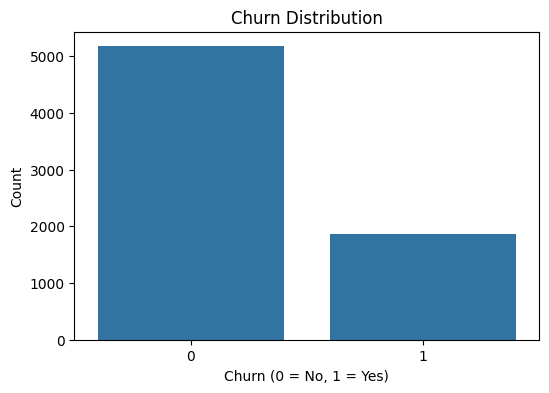

Churn distribution (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Numeric Feature Distributions:


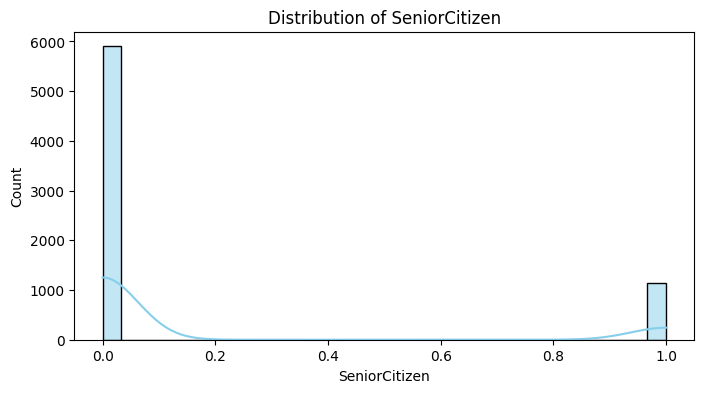

SeniorCitizen - Skewness: 1.83, Kurtosis: 1.36


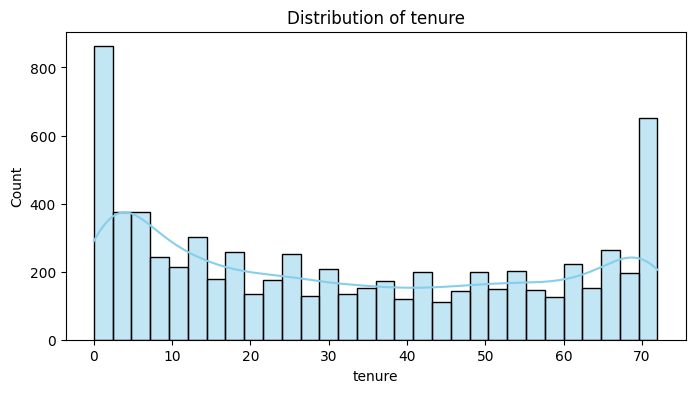

tenure - Skewness: 0.24, Kurtosis: -1.39


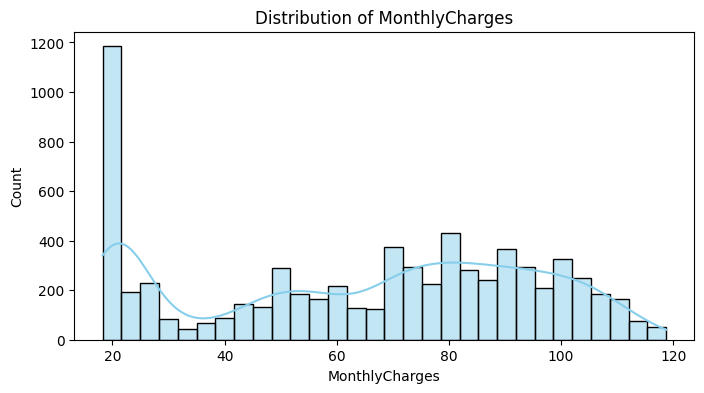

MonthlyCharges - Skewness: -0.22, Kurtosis: -1.26


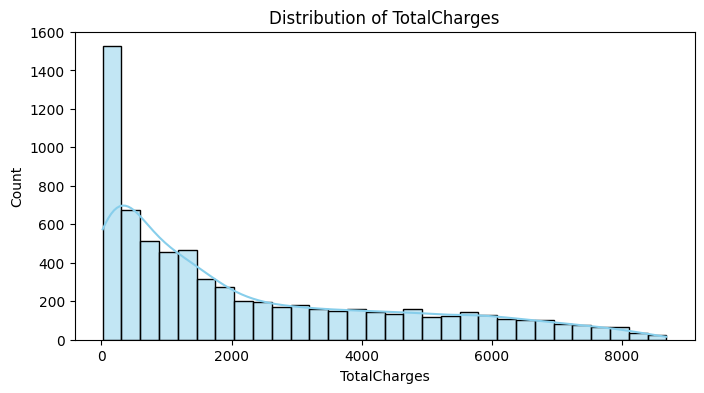

TotalCharges - Skewness: 0.96, Kurtosis: -0.23


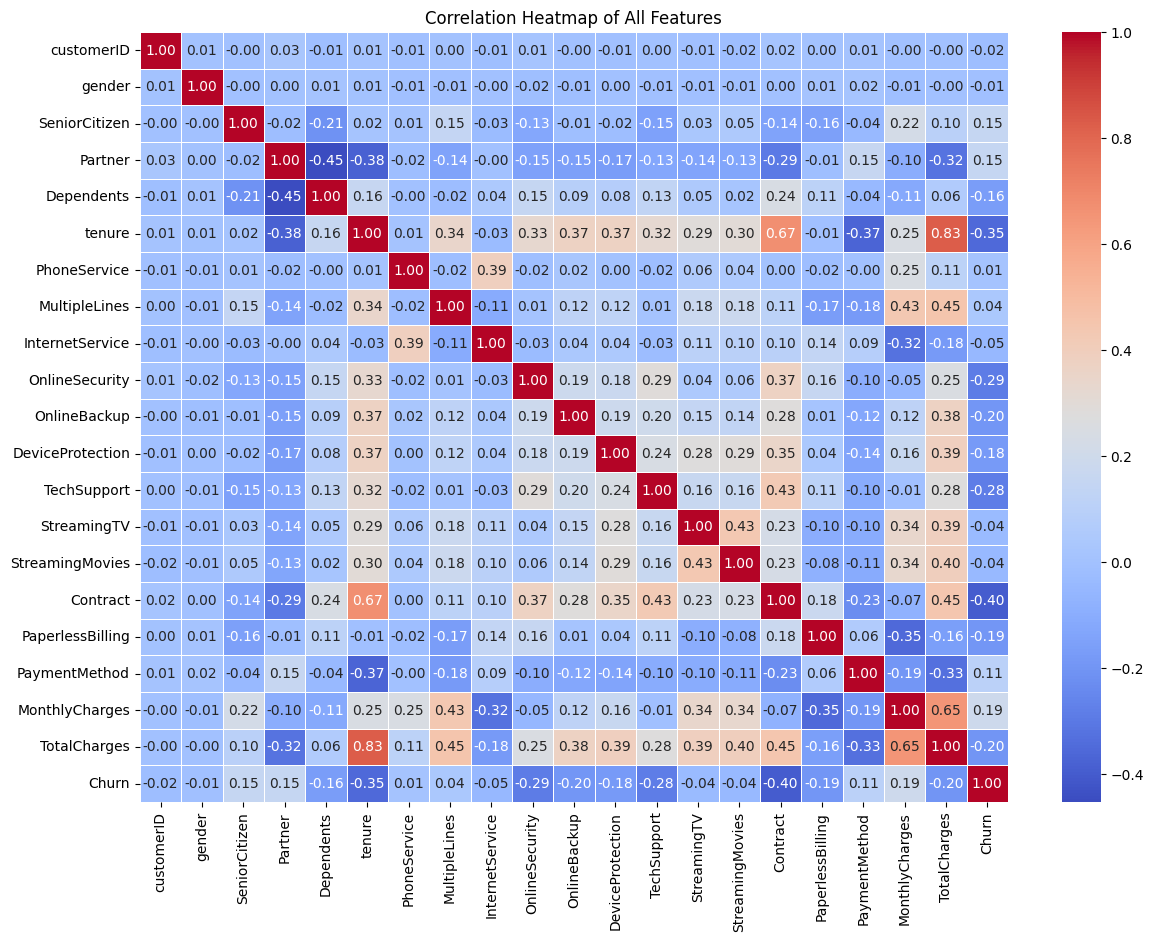


Correlation with Churn (top 5 positive and negative):
Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
Partner           0.150448
PaymentMethod     0.107062
Name: Churn, dtype: float64
TotalCharges     -0.199037
TechSupport      -0.282492
OnlineSecurity   -0.289309
tenure           -0.352229
Contract         -0.396713
Name: Churn, dtype: float64


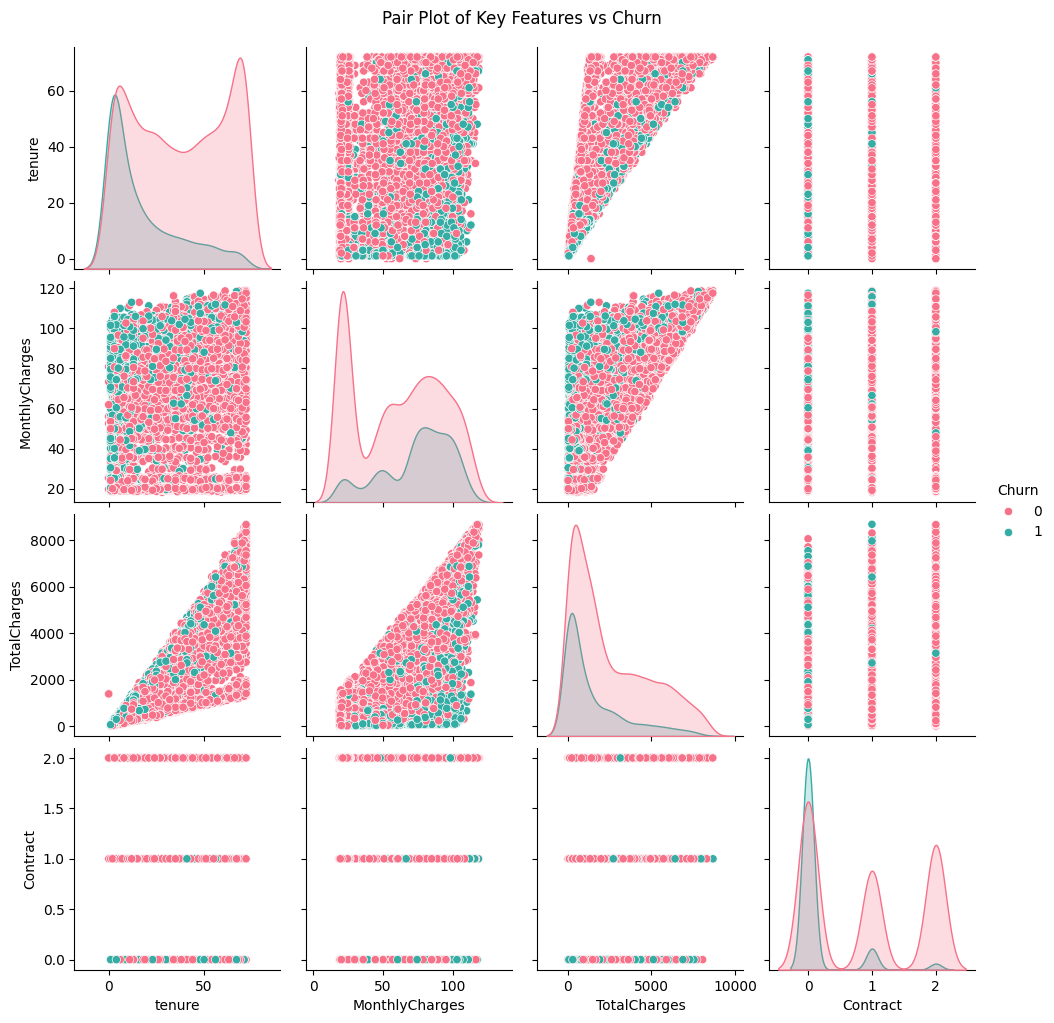

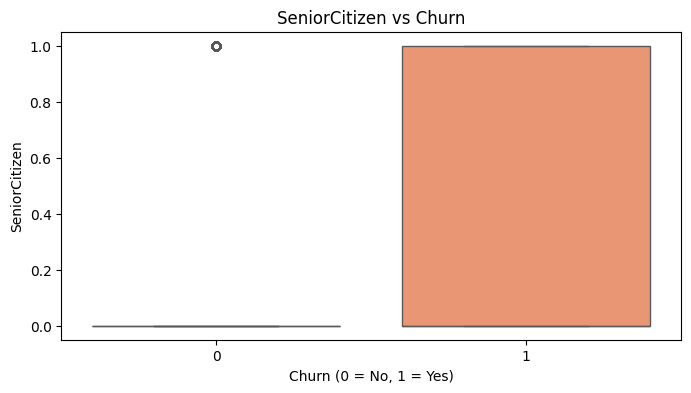

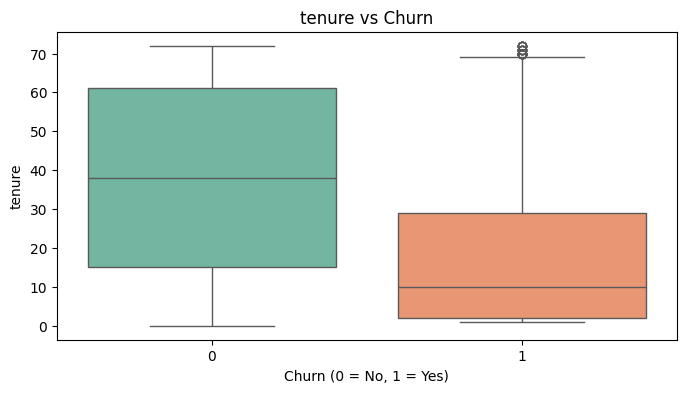

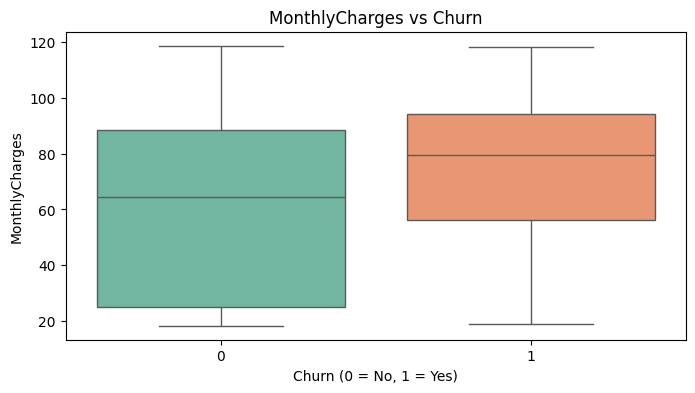

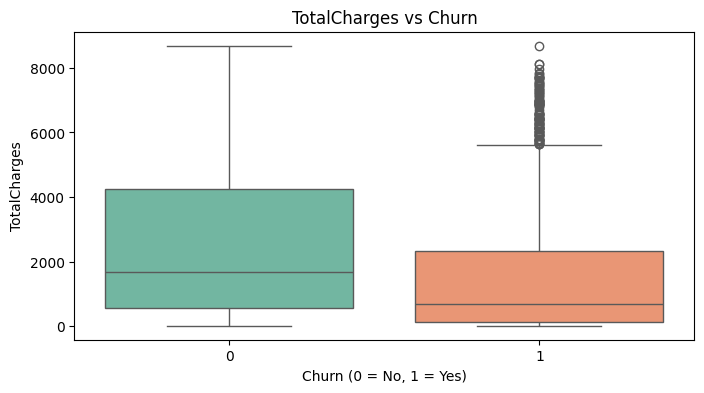

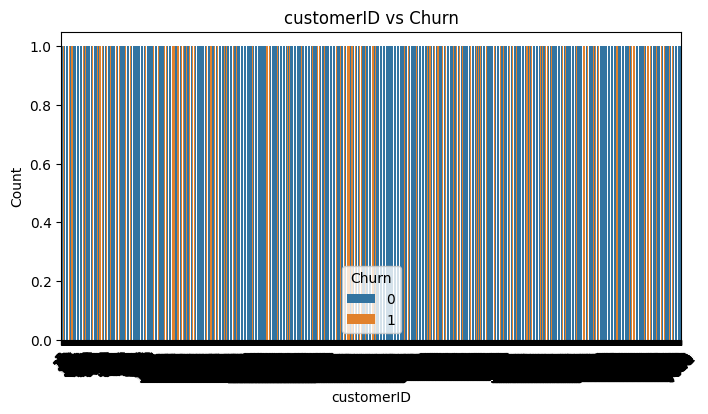

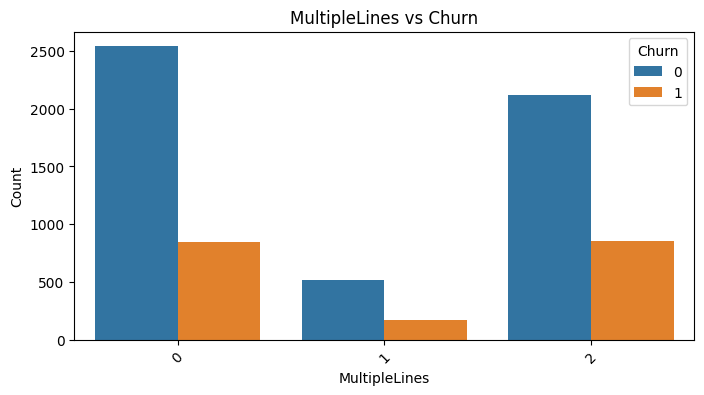

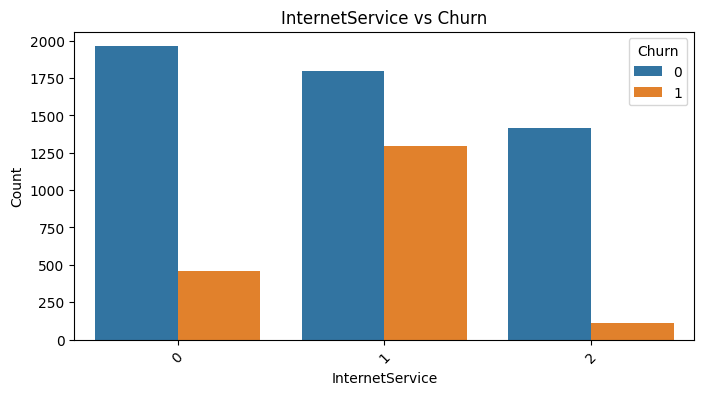

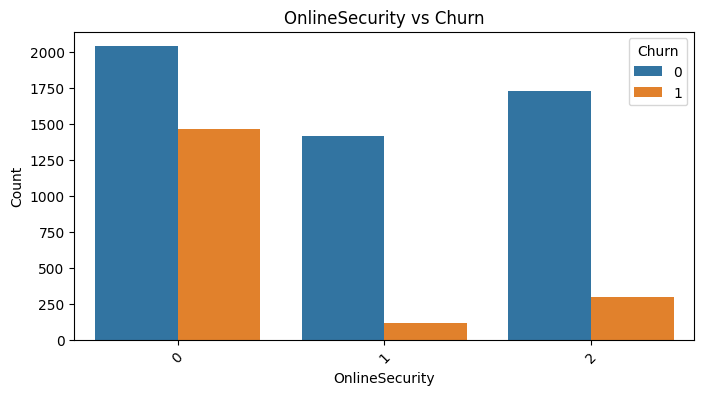

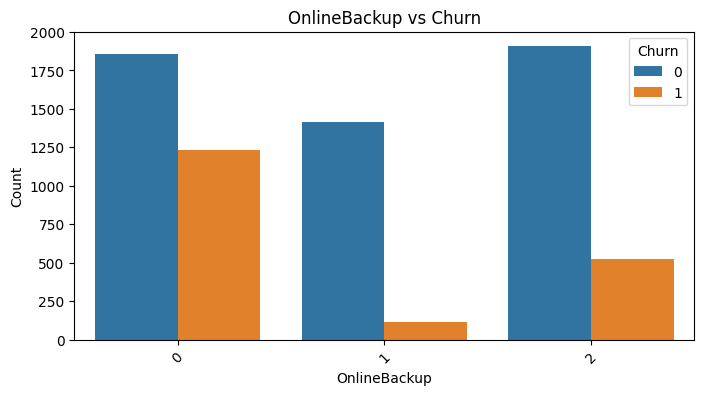


Top 10 Important Features affecting Churn:
TotalCharges       0.157868
MonthlyCharges     0.145979
tenure             0.138915
customerID         0.130442
Contract           0.082580
OnlineSecurity     0.041921
PaymentMethod      0.041798
TechSupport        0.034164
InternetService    0.026080
OnlineBackup       0.023915
dtype: float64


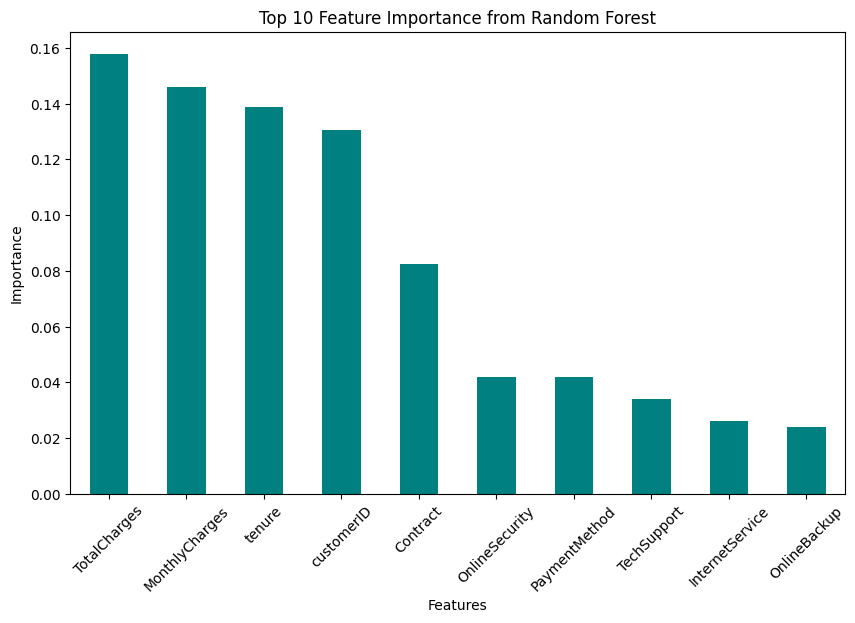

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

ydata-profiling report generated as 'eda_report.html'


In [4]:
print("Task 3: Exploratory Data Analysis")
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
print("Basic statistics:")
print(df.describe())
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
churn_dist = df['Churn'].value_counts(normalize=True) * 100
print("Churn distribution (%):")
print(churn_dist)

# Numeric feature distributions
print("\nNumeric Feature Distributions:")
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    print(f"{col} - Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}")

# Correlation analysis
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of All Features")
plt.show()

# Focus on Churn correlations
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print("\nCorrelation with Churn (top 5 positive and negative):")
print(churn_corr.head(5))
print(churn_corr.tail(5))

# Pair plot for key features
key_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'Churn']
sns.pairplot(df[key_features], hue='Churn', diag_kind='kde', palette='husl')
plt.suptitle("Pair Plot of Key Features vs Churn", y=1.02)
plt.show()

# Box plots for numeric features vs Churn
# for col in numeric_cols:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
#     plt.title(f"{col} vs Churn")
#     plt.xlabel("Churn (0 = No, 1 = Yes)")
#     plt.ylabel(col)
#     plt.show()
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=col, hue='Churn', data=df, palette='Set2', legend=False)
    plt.title(f"{col} vs Churn")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()

# Categorical feature analysis
encoded_cats = categorical_cols + binary_cols
for col in encoded_cats[:5]:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Feature importance
X = df.drop('Churn', axis=1)
y = df['Churn']
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features affecting Churn:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

profile = ProfileReport(df, title="EDA Profiling Report", explorative=True)
profile.to_file("eda_report.html")
print("ydata-profiling report generated as 'eda_report.html'")

In [5]:

print("Task 4: Split Dataset and SweetViz Comparison")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
train_df.to_csv('train_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)
report = sv.compare([train_df, "Training Data"], [test_df, "Test Data"], target_feat="Churn")
report.show_html("train_test_comparison.html")
print("SweetViz comparison report generated as 'train_test_comparison.html'")


Task 4: Split Dataset and SweetViz Comparison


                                             |          | [  0%]   00:00 -> (? left)

Report train_test_comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
SweetViz comparison report generated as 'train_test_comparison.html'


In [6]:
print("Task 5: Limitations/Issues")
churn_dist = df['Churn'].value_counts(normalize=True) * 100
print("Churn distribution (%):")
print(churn_dist)

print("""
Observations and potential issues with the dataset:
1. Missing values in 'TotalCharges' were originally empty strings, now filled with the median, which might not reflect true values for new customers.
2. Numeric features like tenure and TotalCharges have outliers, with extreme values that could skew predictions.
3. High dimensionality after encoding creates many columns (e.g., 20 now, potentially more with one-hot encoding), making models complex.
4. Class imbalance in 'Churn' shows 73% don’t churn vs. 27% do, which might bias models toward predicting 'no churn.'
5. Limited numeric features—only tenure, MonthlyCharges, and TotalCharges are naturally numeric—restrict continuous data for analysis.
""")

Task 5: Limitations/Issues
Churn distribution (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Observations and potential issues with the dataset:
1. Missing values in 'TotalCharges' were originally empty strings, now filled with the median, which might not reflect true values for new customers.
2. Numeric features like tenure and TotalCharges have outliers, with extreme values that could skew predictions.
3. High dimensionality after encoding creates many columns (e.g., 20 now, potentially more with one-hot encoding), making models complex.
4. Class imbalance in 'Churn' shows 73% don’t churn vs. 27% do, which might bias models toward predicting 'no churn.'
5. Limited numeric features—only tenure, MonthlyCharges, and TotalCharges are naturally numeric—restrict continuous data for analysis.

